# Question 3, linear regression

In [1]:
import json
import datetime
import pytz
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from statistics import mean
import statsmodels.api as sm

In [2]:
path = "../../projects/project_5/ECE219_tweet_data/"

files = ["tweets_#gohawks.txt", "tweets_#gopatriots.txt", \
        "tweets_#nfl.txt", "tweets_#patriots.txt", \
        "tweets_#sb49.txt", "tweets_#superbowl.txt"]
topics = ["gohawks", "gopatriots", "nfl", "patriots", "sb49", "superbowl"]

for i, fl in enumerate(files):
    print("files[" + str(i) + "] => " + fl)

files[0] => tweets_#gohawks.txt
files[1] => tweets_#gopatriots.txt
files[2] => tweets_#nfl.txt
files[3] => tweets_#patriots.txt
files[4] => tweets_#sb49.txt
files[5] => tweets_#superbowl.txt


#### Prepare for data

In [25]:
def prase_dataset(file):
    """
    Prase x conponent of the dataset into pandas DataFrame including columns of:
    tweets, retweets, total_followers, max_followers, hour of the day
    with lines of hours,
    Prase y of dataset as number of tweets in the next hour.
    """
   
    # extract raw features
    pst_tz = pytz.timezone('America/Los_Angeles')
    data_raw = []
    for line in open(path + file, 'r') :
        row_tmp = []
        a = json.loads(line)
        time = a['citation_date']
        retweet = a['metrics']['citations']['total']
        foll = a['author']['followers']        
        row_tmp.append(time)
        row_tmp.append(retweet)
        row_tmp.append(foll)        
        data_raw.append(row_tmp)
    
    # sort according to time
    pddata_raw = pd.DataFrame(data_raw,columns=['time','retweets','followers'])
    pddata_raw = pddata_raw.sort_values(by = 'time')
    pddata_raw = pddata_raw.reset_index(drop=True)
    pddata_raw['tweets'] = 1    
#     print(pddata_raw)

    # reset time to hour index
    hour_accu = []
    hour_day = []
    for index, row in pddata_raw.iterrows():  
        p = datetime.datetime.fromtimestamp(row["time"], pst_tz)  
        hour_accu.append(((p.month-1)*31+p.day-14)*24+p.hour)
        hour_day.append(p.hour)    
    pddata_raw["time"] = hour_accu
    pddata_raw["hour of day"] = hour_day
    
    # create a new dataframe with desired form
    df = pd.DataFrame([],columns=['hour index','tweets','retweets','followers sum','followers max','hour of day'])
    df['hour index'] = range(pddata_raw.iloc[len(pddata_raw.index)-1,0]+1)
    df['tweets'] = pddata_raw.groupby("time")['tweets'].sum()
    df['retweets'] = pddata_raw.groupby("time")['retweets'].sum()
    df['followers sum'] = pddata_raw.groupby("time")['followers'].sum()
    df['followers max'] = pddata_raw.groupby("time")["followers"].max()
    df['hour of day'] = pddata_raw.groupby("time")['hour of day'].mean()
    df = df.drop([0]).fillna(0).reset_index(drop=True)

    # assign number of tweets of the next hour to be the target value
    df_y = df.iloc[1:,1].reset_index(drop=True)
    df = df[:len(df_y)]
    
    return df.iloc[:,1:],df_y

#### Train linear regression model

In [58]:
def train_lr(i):
    """
    This function gets data and train using a linear regression model
    """    
    df, df_y = prase_dataset(files[i])

    reg = LinearRegression().fit(df, df_y)
    pred_y = reg.predict(df)
    MSE = mean_squared_error(df_y, pred_y)
    R2 = r2_score(df_y, pred_y)
    
    print(topics[i])
    print('MSE for test data = ',MSE)
    print('R2 score for test data = ',R2)   
    
    return df, df_y, pred_y

In [59]:
def plot_recipe(df_y, pred_y):
    """
    This function plots fitted values vs true values
    """
    plt.figure()
    area = np.pi * (4)**2/4
    plt.scatter(df_y, pred_y, s = area)
    plt.plot([df_y.min(), df_y.max()], [df_y.min(), df_y.max()], 'k--', lw = 1)
    plt.xlabel('true values')
    plt.ylabel('fitted values')
    plt.show()

In [60]:
def ols_regression(df, df_y):
    X2 = sm.add_constant(df)
    y = df_y.as_matrix()
    lm = sm.OLS(y, X2).fit()
    print(lm.summary())
    print(list(df))

## Results

#### gohawks

gohawks
MSE for test data =  759843.8445222701
R2 score for test data =  0.4764399847953503


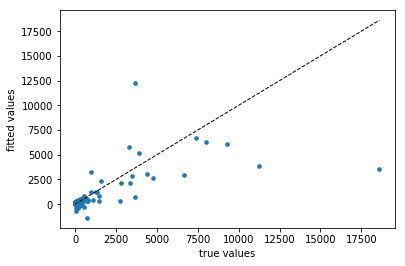

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     103.9
Date:                Tue, 19 Mar 2019   Prob (F-statistic):           7.03e-78
Time:                        01:13:46   Log-Likelihood:                -4725.3
No. Observations:                 577   AIC:                             9463.
Df Residuals:                     571   BIC:                             9489.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            94.2103     70.292      1.340

In [61]:
df, df_y, pred_y = train_lr(0)
plot_recipe(df_y,pred_y)
ols_regression(df, df_y)

#### gopatriots

gopatriots
MSE for test data =  27588.58568971645
R2 score for test data =  0.6293383566038233


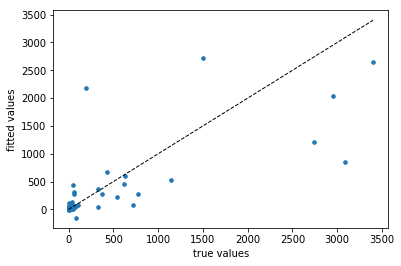

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     192.9
Date:                Tue, 19 Mar 2019   Prob (F-statistic):          7.06e-120
Time:                        01:13:48   Log-Likelihood:                -3749.1
No. Observations:                 574   AIC:                             7510.
Df Residuals:                     568   BIC:                             7536.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.0229     10.869      0.554

In [62]:
df, df_y, pred_y = train_lr(1)
plot_recipe(df_y,pred_y)
ols_regression(df, df_y)

#### nfl

nfl
MSE for test data =  270401.9140603445
R2 score for test data =  0.5707688538937594


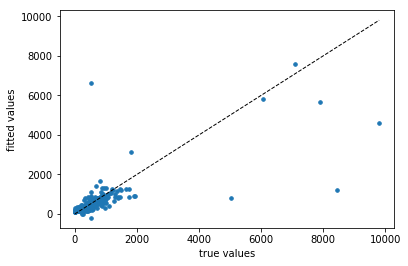

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     154.0
Date:                Tue, 19 Mar 2019   Prob (F-statistic):          7.45e-104
Time:                        01:14:23   Log-Likelihood:                -4488.6
No. Observations:                 585   AIC:                             8989.
Df Residuals:                     579   BIC:                             9015.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           123.7556     42.809      2.891

In [63]:
df, df_y, pred_y = train_lr(2)
plot_recipe(df_y,pred_y)
ols_regression(df, df_y)

#### patriots

patriots
MSE for test data =  5189695.980567308
R2 score for test data =  0.6684079890987789


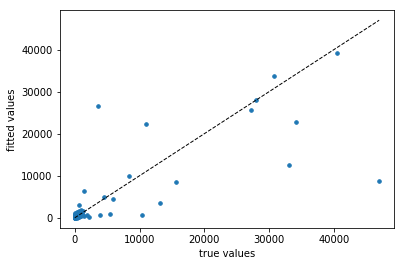

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     233.4
Date:                Tue, 19 Mar 2019   Prob (F-statistic):          3.35e-136
Time:                        01:14:56   Log-Likelihood:                -5352.8
No. Observations:                 585   AIC:                         1.072e+04
Df Residuals:                     579   BIC:                         1.074e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           181.2843    184.677      0.982

In [64]:
df, df_y, pred_y = train_lr(3)
plot_recipe(df_y,pred_y)
ols_regression(df, df_y)

#### sb49

sb49
MSE for test data =  16107134.315916983
R2 score for test data =  0.804588854407114


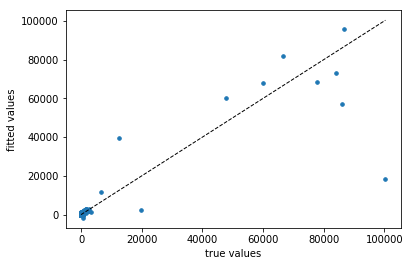

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     476.8
Date:                Tue, 19 Mar 2019   Prob (F-statistic):          1.45e-202
Time:                        01:15:52   Log-Likelihood:                -5684.1
No. Observations:                 585   AIC:                         1.138e+04
Df Residuals:                     579   BIC:                         1.141e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           171.9764    299.240      0.575

In [65]:
df, df_y, pred_y = train_lr(4)
plot_recipe(df_y,pred_y)
ols_regression(df, df_y)

#### superbowl

superbowl
MSE for test data =  52573154.30093935
R2 score for test data =  0.7998348436989455


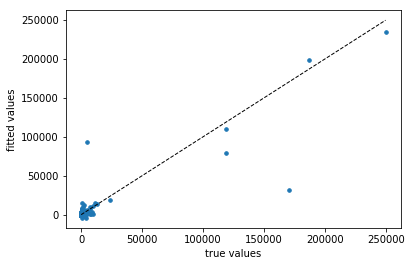

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     462.7
Date:                Tue, 19 Mar 2019   Prob (F-statistic):          1.51e-199
Time:                        01:17:24   Log-Likelihood:                -6030.1
No. Observations:                 585   AIC:                         1.207e+04
Df Residuals:                     579   BIC:                         1.210e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -150.5245    608.009     -0.248

In [66]:
df, df_y, pred_y = train_lr(5)
plot_recipe(df_y,pred_y)
ols_regression(df, df_y)